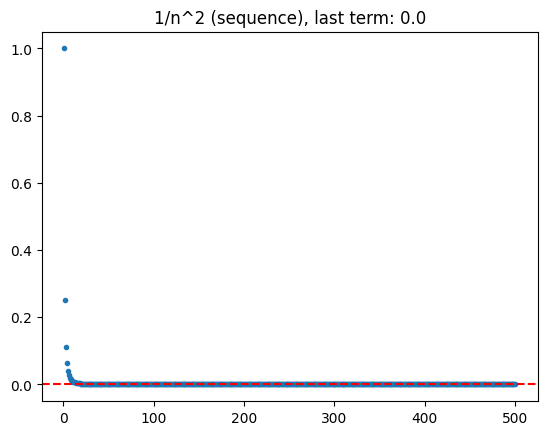

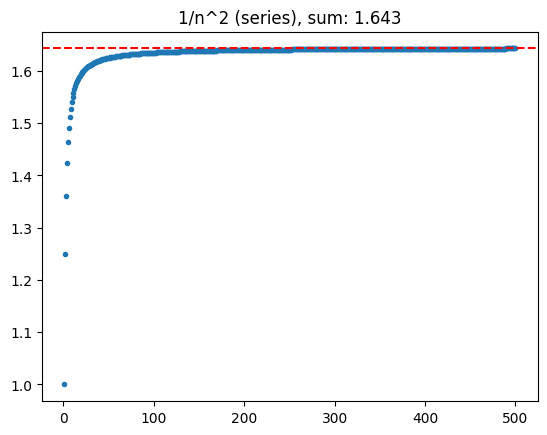

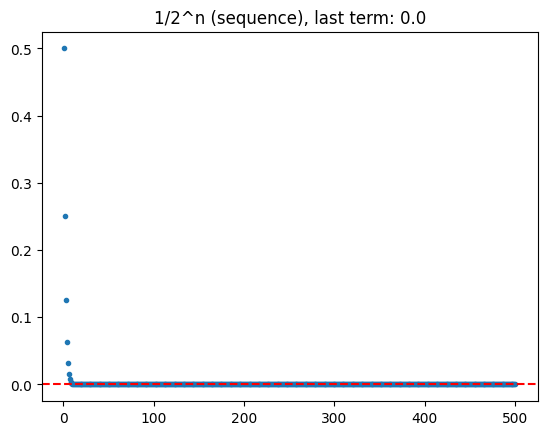

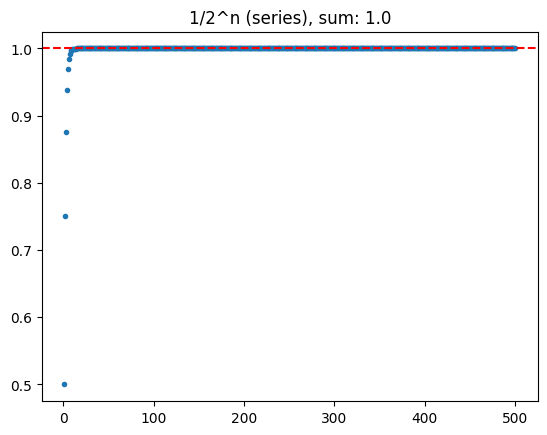

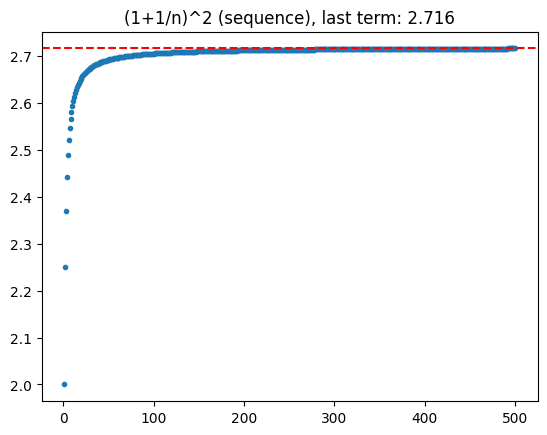

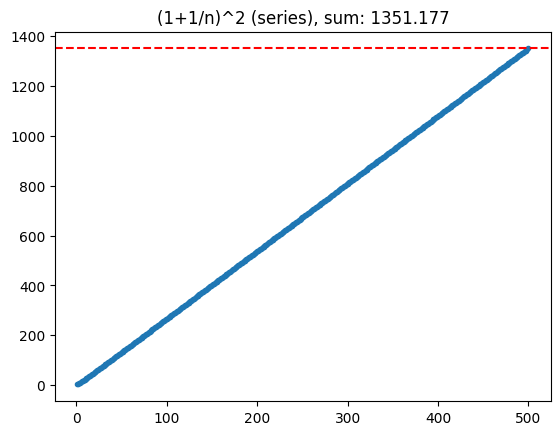

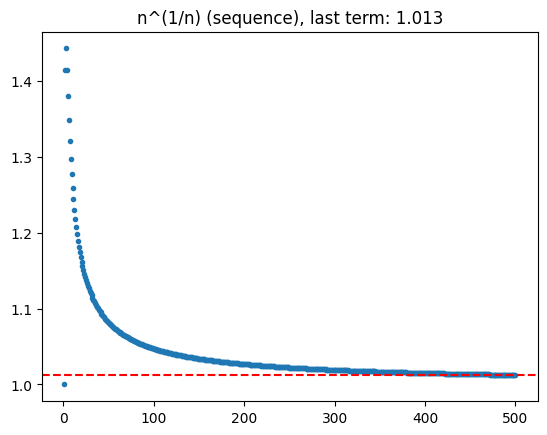

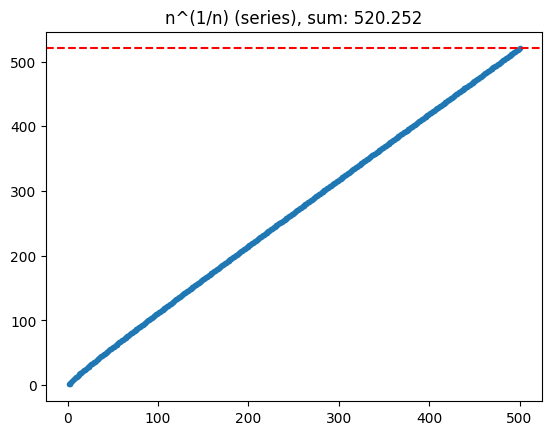

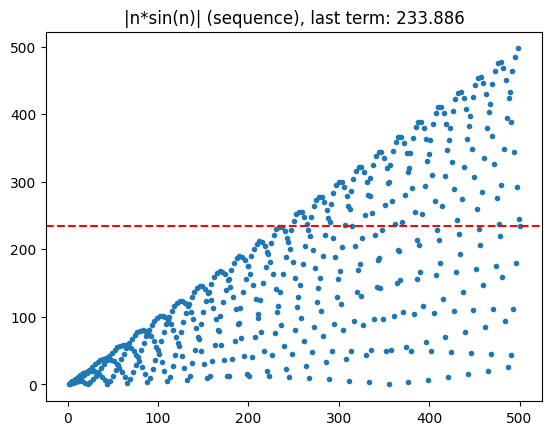

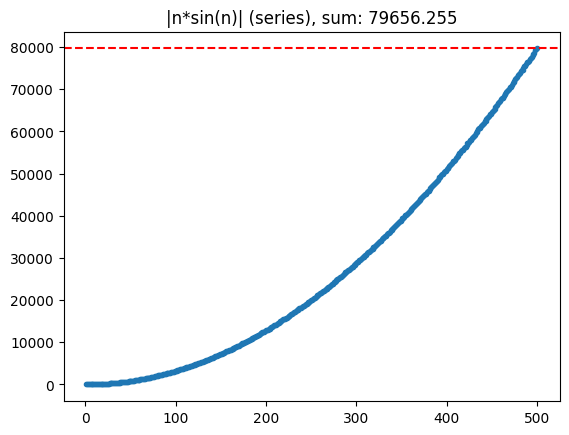

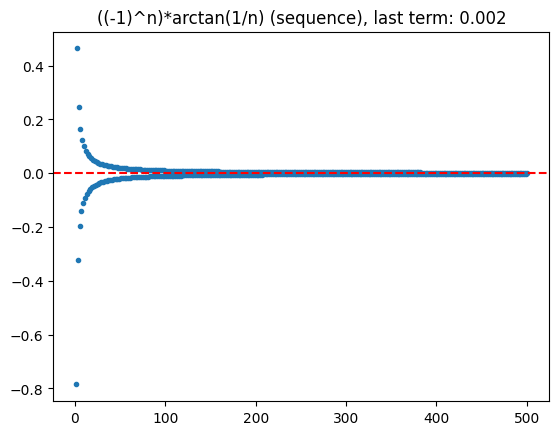

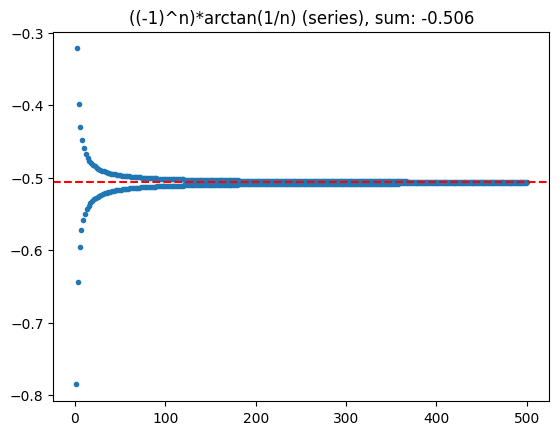

In [35]:
# en: Program to compute the terms of any sequence, 
# the sum and terms of its associated series, and plot sequence and series.
# it: Programma per calcolare i termini di qualsiasi sequenza, 
# la somma e termini della serie associata, e visualizzare sequenza e serie.

# Made by Giuseppe Tavella, Computer engineering student at Unical, DIMES


import math
import matplotlib.pyplot as plt


# n: mobile index

# Harmonic generalized
def sequenceA(start,end):
    return lambda n: 1/(n**2)

# Geometric 
def sequenceB(start,end):
    return lambda n: (1/2)**n

# Euler number
def sequenceC(start,end):
    return lambda n: (1+1/n)**n

def sequenceD(start,end):
    return lambda n: n**(1/n)

def sequenceE(start,end):
    return lambda n: abs(n*math.sin(n))

def sequenceF(start,end):
    return lambda n: ((-1)**n)*math.atan(1/n)

# STEP 1: define your sequence here.




class Series:
    def __init__(self,meta):
        self.start = meta['start']
        self.end = meta['end']
        self.interval=[]
        for n in range(self.start,self.end+1):
            self.interval.append(n)
            
    def plot(self,series_params):
        series_name=series_params['name']
        sequence=series_params['sequence_fn'](self.start,self.end)
        terms=[]
        series=[]
        s=[0]
        
        # after computation, terms, series and sum will get populated/updated         
        self.compute(sequence,terms,series,s)
        
        # sequence visualization         
        fig, ax = plt.subplots(1,1)  
        plt.plot(self.interval, terms, '.')  
        plt.title(f'{series_name} (sequence), last term: {round(terms[-1],3)}')
        plt.axhline(y=terms[-1],color = 'r',linestyle='--') 
        
        # series visualization         
        fig, ax = plt.subplots(1,1)  
        plt.plot(self.interval, series, '.')
        plt.axhline(y=series[-1],color = 'r',linestyle='--') 
        plt.title(f'{series_name} (series), sum: {round(s[0],3)}')
    
    def compute(self,sequence,terms,series,s):
        def f(n):
            term=sequence(n)
            s[0]+=term
            terms.append(term)
            series.append(s[0])
            if n==self.end: return
            f(n+1)
        f(self.start)
        

        
# STEP 2: here you can edit start and end
series=Series({
    'start': 1,
    'end': 500
})


# STEP 3: add your new sequence here, you can give it a name
series.plot({'sequence_fn': sequenceA, 'name': '1/n^2'})
series.plot({'sequence_fn': sequenceB, 'name': '1/2^n'})
series.plot({'sequence_fn': sequenceC, 'name': '(1+1/n)^2'})
series.plot({'sequence_fn': sequenceD, 'name': 'n^(1/n)'})
series.plot({'sequence_fn': sequenceE, 'name': '|n*sin(n)|'})
series.plot({'sequence_fn': sequenceF, 'name': '((-1)^n)*arctan(1/n)'})


